# Restoring Color to Greyscale Images

In [378]:
import image
import os
import random
import numpy as np
import scipy as sp
import time

import lasagne
import theano
import theano.tensor as T

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib import cm
figsize(16, 4)

In [379]:
imdir = "images/raw"
handles = [os.path.join(imdir, h) for h in os.listdir(imdir)]
random.shuffle(handles)
print "Found {l} image handles".format(l=len(handles))

Found 30113 image handles


In [380]:
import convnet
reload(convnet)
reload(image)

SIZE = 100

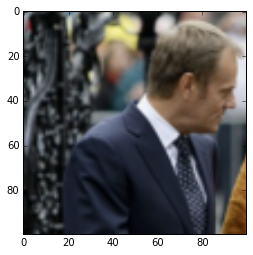

In [381]:
val_images, test_images, train_handles = convnet.ValidationTestTrainSplit(
    handles, 50, 10, SIZE, SIZE)
plt.imshow(val_images[0])
plt.show()

In [382]:
net, train_fn, val_fn = convnet.CreateTheanoExprs(SIZE, SIZE, 0.001)

In [383]:
#batch_stats, val_stats, err, net = convnet.Train(
images = convnet.Train(
    num_batches=6,
    validate_every_n_batches=2,
    height=SIZE,
    width=SIZE,
    batch_size=100,
    image_handles=handles,
    val_set_size=100,
    test_set_size=100,
    net=net,
    train_fn=train_fn,
    val_fn=val_fn)

Loading validation and testing images...
Starting training...
Training batch 0 of 100 images. Last time = 0.00 seconds. Last load time = 0.00 seconds. Last error = 1.00000.
Training batch 1 of 100 images. Last time = 2.86 seconds. Last load time = 1.69 seconds. Last error = 3.08587.

Validating...
Validated on 100 images in 1.14 seconds. Error = 1.94675.

Training batch 2 of 100 images. Last time = 2.92 seconds. Last load time = 1.57 seconds. Last error = 2.84398.
Training batch 3 of 100 images. Last time = 2.81 seconds. Last load time = 1.55 seconds. Last error = 1.95285.

Validating...
Validated on 100 images in 1.07 seconds. Error = 1.47486.

Training batch 4 of 100 images. Last time = 2.90 seconds. Last load time = 1.55 seconds. Last error = 1.86897.
Training batch 5 of 100 images. Last time = 2.81 seconds. Last load time = 1.54 seconds. Last error = 1.47151.

Validating...
Validated on 100 images in 1.06 seconds. Error = 1.06779.


Testing!...
Testing completed in 1.09 seconds. Te

In [384]:
def PrintShapes(net):
    print net.__class__.__name__, getattr(net, "input_shape", ""), "=>", getattr(net, "output_shape", "")
    input_layer = getattr(net, "input_layer", None)
    if input_layer:
        PrintShapes(input_layer)

In [393]:
PrintShapes(net)

DimshuffleLayer (None, 3, 100, 100) => (None, 100, 100, 3)
Conv2DLayer (None, 5, 100, 100) => (None, 3, 100, 100)
Conv2DLayer (None, 12, 100, 100) => (None, 5, 100, 100)
Conv2DLayer (None, 1, 100, 100) => (None, 12, 100, 100)
DimshuffleLayer (None, 100, 100) => (None, 1, 100, 100)
InputLayer  => (None, 100, 100)
